In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fault_data.csv')

In [3]:
df.head()

,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Fault ID                              506 non-null    object 
 1   Fault Type                            506 non-null    object 
 2   Fault Location (Latitude, Longitude)  506 non-null    object 
 3   Voltage (V)                           506 non-null    int64  
 4   Current (A)                           506 non-null    int64  
 5   Power Load (MW)                       506 non-null    int64  
 6   Temperature (°C)                      506 non-null    int64  
 7   Wind Speed (km/h)                     506 non-null    int64  
 8   Weather Condition                     506 non-null    object 
 9   Maintenance Status                    506 non-null    object 
 10  Component Health                      506 non-null    object 
 11  Duration of Fault (

In [5]:
df['Down time (hrs)'].unique()

array([1. , 5. , 6. , 3. , 4. , 7. , 6.1, 2.1, 4.7, 2.8, 1.9, 6.9, 6.4,
       5.8, 3.7, 5.9, 4.2, 6.2, 5.4, 3.3, 3.6, 4.6, 6.5, 2.9, 5.7, 1.5,
       5.5, 6.8, 4.5, 6.7, 5.1, 1.3, 2.5, 1.1, 3.1, 6.6, 1.8, 4.8, 5.3,
       3.5, 6.3, 1.2, 4.3, 1.4, 2. , 1.7, 5.6, 5.2, 3.8, 2.6, 3.9, 1.6,
       2.2, 2.7, 4.1, 4.9, 3.2, 2.3, 2.4, 4.4, 3.4])

In [6]:
df['Component Health'].unique()

array(['Normal', 'Faulty', 'Overheated'], dtype=object)

In [7]:
df['Fault Type'].unique()

array(['Line Breakage', 'Transformer Failure', 'Overheating'],
      dtype=object)

In [8]:
df['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Windstorm', 'Snowy', 'Thunderstorm'],
      dtype=object)

In [9]:
df['Maintenance Status'].unique()

array(['Scheduled', 'Completed', 'Pending'], dtype=object)

In [10]:
df.shape

(506, 13)

In [11]:
from ydata_profiling import ProfileReport



In [13]:
profile = ProfileReport(df,explorative=True)
profile.to_file('report.html')
print('done')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 72.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

done


In [11]:
df = df.drop(columns=['Fault ID','Wind Speed (km/h)','Weather Condition','Down time (hrs)','Fault Location (Latitude, Longitude)'])

In [12]:
df.head()

,Fault Type,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Maintenance Status,Component Health,Duration of Fault (hrs)
0,Line Breakage,2200,250,50,25,Scheduled,Normal,2.0
1,Transformer Failure,1800,180,45,28,Completed,Faulty,3.0
2,Overheating,2100,230,55,35,Pending,Overheated,4.0
3,Line Breakage,2050,240,48,23,Completed,Normal,2.5
4,Transformer Failure,1900,190,50,30,Scheduled,Faulty,3.5


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop(columns=['Component Health'])
y = df['Component Health']

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.3 , random_state=42)

In [15]:
x_train.head()

,Fault Type,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Maintenance Status,Duration of Fault (hrs)
5,Overheating,2150,220,52,32,Pending,5.0
116,Transformer Failure,2262,220,55,35,Completed,5.2
45,Transformer Failure,1986,213,51,31,Completed,3.4
16,Overheating,2263,229,55,21,Scheduled,4.5
468,Overheating,2043,207,52,37,Pending,4.6


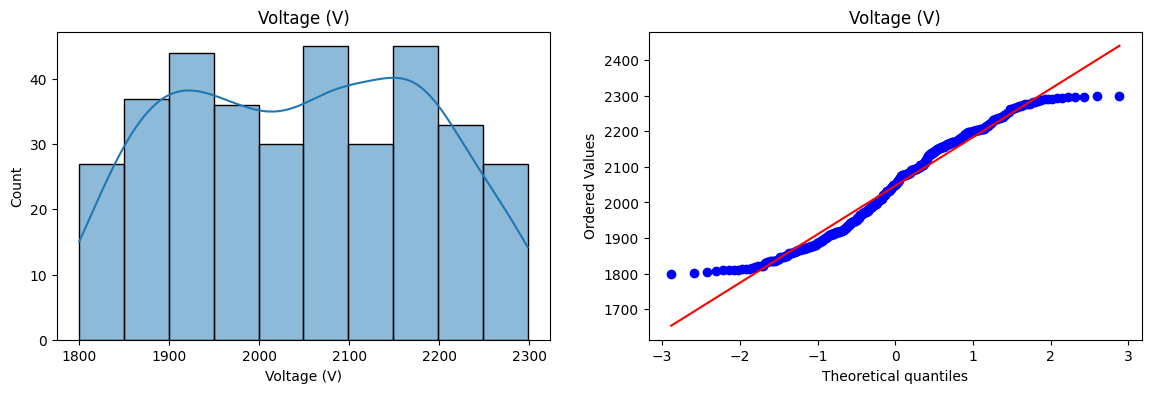

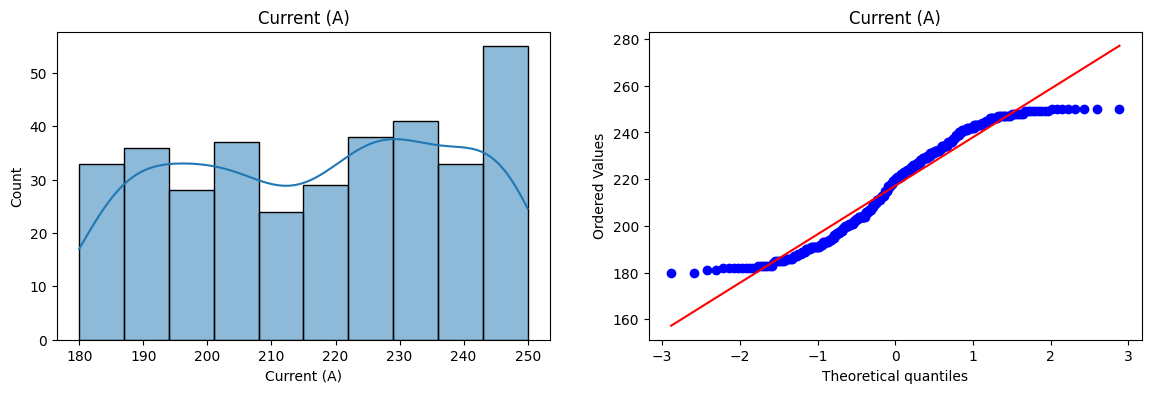

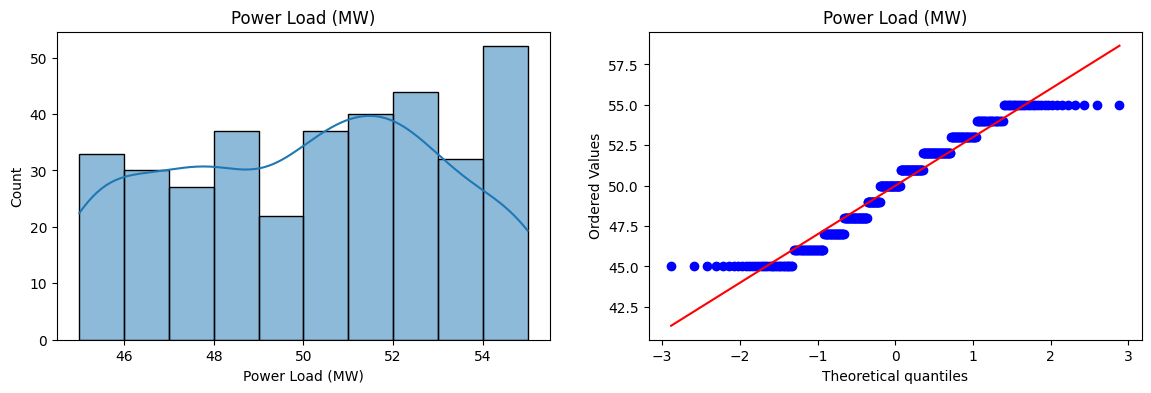

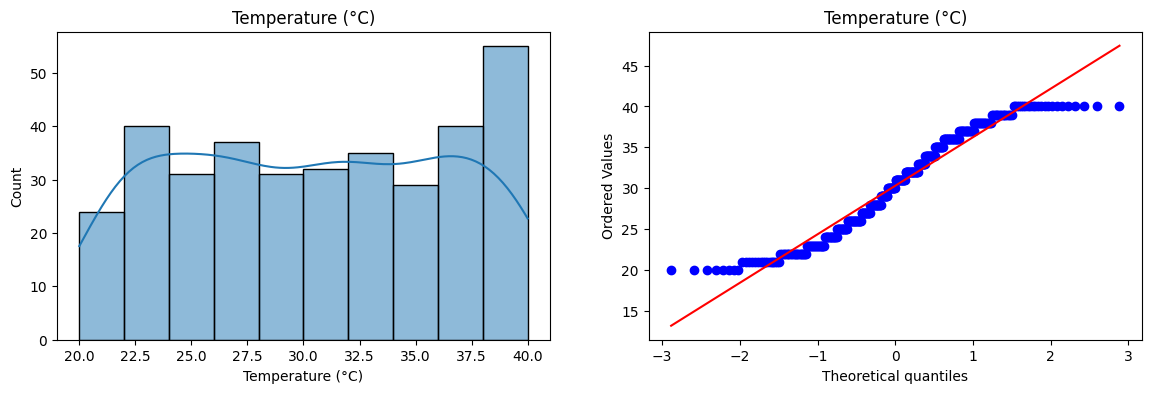

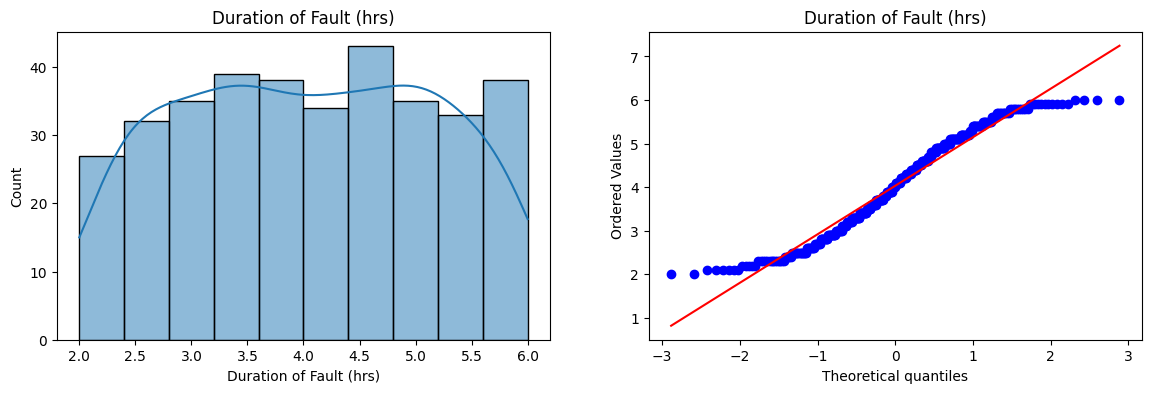

In [16]:
#  see the data does it rquire the the mathematical transformation 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

selected_columns = x_train.drop(columns=['Fault Type','Maintenance Status'])

for col in selected_columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()
    

In [24]:
# apply transformation on this 
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [27]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)

x_train_transformed = pt.fit_transform(selected_columns)
x_test_transformed = pt.transform(selected_columns)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12568\832486188.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


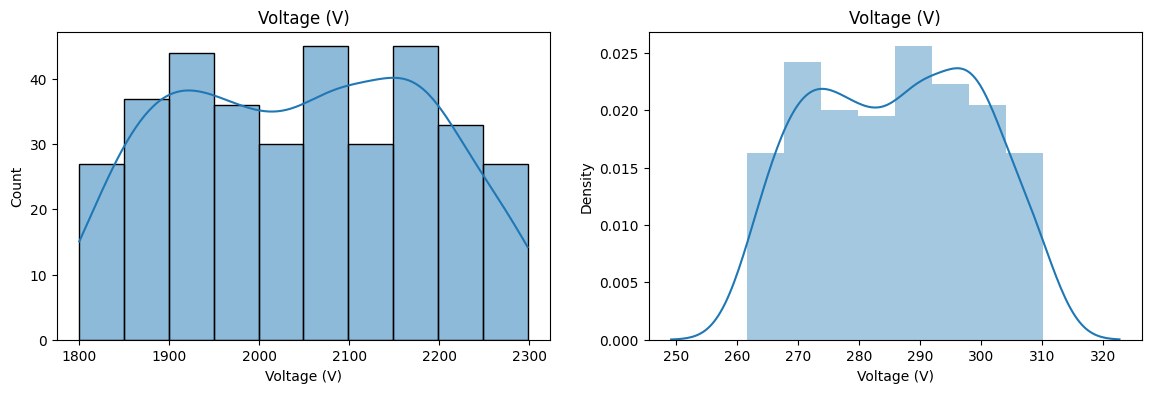

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12568\832486188.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


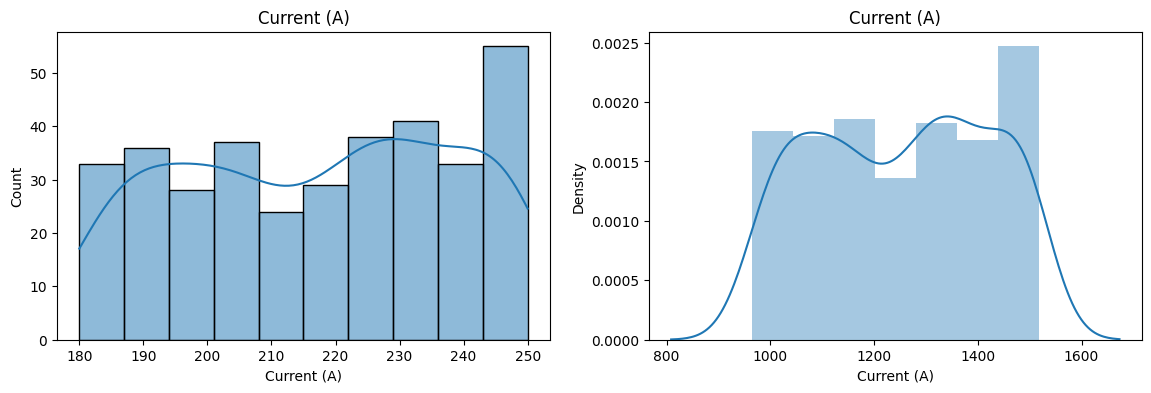

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12568\832486188.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


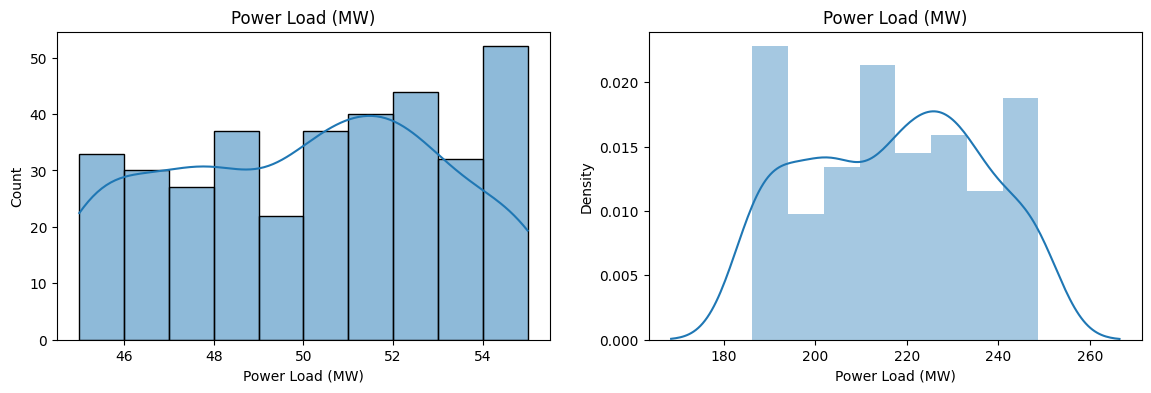

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12568\832486188.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


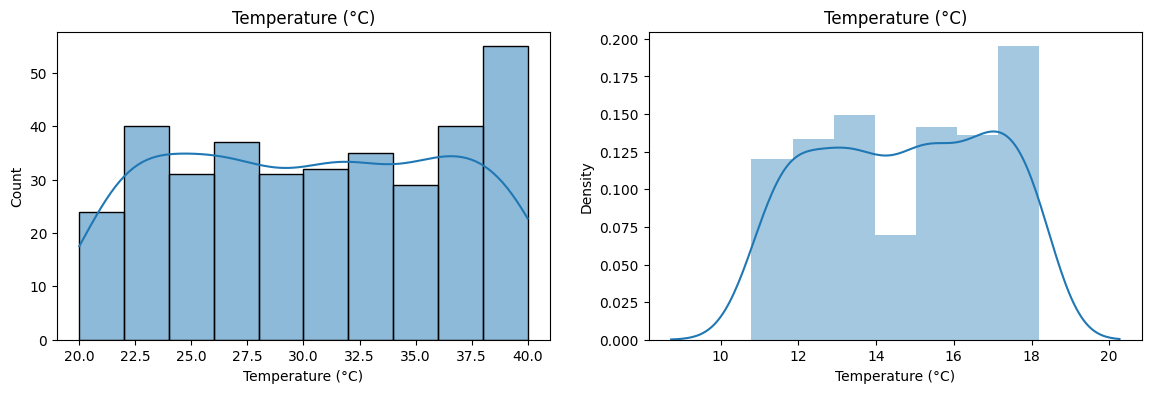

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12568\832486188.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


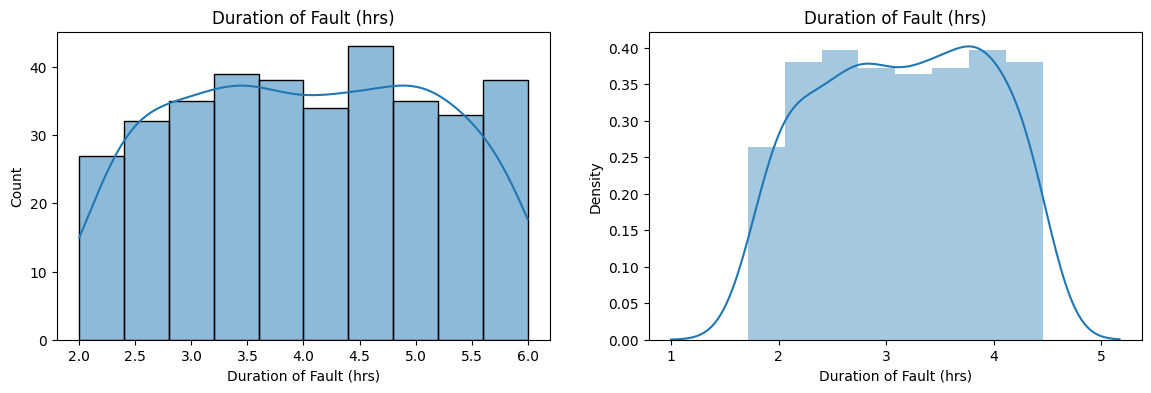

In [32]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns= selected_columns.columns)

for col in selected_columns.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)

    plt.show()

// encoding - ohe - fault type , maintenance status
            - label - component health

// scaling - minmaxscaler - voltage , current , power load , tempreture , duration of fault



In [18]:
x_train.head()

,Fault Type,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Maintenance Status,Duration of Fault (hrs)
5,Overheating,2150,220,52,32,Pending,5.0
116,Transformer Failure,2262,220,55,35,Completed,5.2
45,Transformer Failure,1986,213,51,31,Completed,3.4
16,Overheating,2263,229,55,21,Scheduled,4.5
468,Overheating,2043,207,52,37,Pending,4.6


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

encode_cols = ['Fault Type', 'Maintenance Status']
scale_cols = ['Voltage (V)', 'Current (A)', 'Power Load (MW)', 'Temperature (°C)', 'Duration of Fault (hrs)']

trf1 = ColumnTransformer([
    ('scale',MinMaxScaler(),scale_cols),
    ('encode',OneHotEncoder(handle_unknown='ignore'),encode_cols),
    ('transformation',PowerTransformer(method='yeo-johnson',standardize=False),scale_cols)
],remainder='passthrough')


In [30]:
from sklearn.preprocessing import LabelEncoder

pipeline = Pipeline([
    ('preprocess', trf1)
])

X_train_processed = pipeline.fit_transform(x_train)
X_test_processed = pipeline.transform(x_test)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import numpy as np

# Initialize model
lin_reg = LinearRegression()

# Use cross_val_predict to get predictions
y_pred_cross = cross_val_predict(lin_reg, X_train_processed, y_train_encoded, cv=5)

# Round predictions and clip to valid class range
y_pred_class = np.round(y_pred_cross).astype(int)
y_pred_class = np.clip(y_pred_class, 0, len(label_encoder.classes_) - 1)

# Evaluate
print("✅ Cross-Validation Accuracy (after rounding):", accuracy_score(y_train_encoded, y_pred_class))
print("🔢 Cross-Validation MSE:", mean_squared_error(y_train_encoded, y_pred_cross))

# Optional: R^2 and Classification Report
print("📈 Cross-Validation R^2 Score:", r2_score(y_train_encoded, y_pred_cross))
print("\n📄 Classification Report (CV):\n", classification_report(y_train_encoded, y_pred_class, target_names=label_encoder.classes_))

# Cross-validated R^2 scores (mean of folds)
cv_scores = cross_val_score(lin_reg, X_train_processed, y_train_encoded, cv=10, scoring='r2')
print("\n🧪 Individual R² Scores (per fold):", cv_scores)
print("📊 Mean R² Score:", np.mean(cv_scores))


✅ Cross-Validation Accuracy (after rounding): 0.3192090395480226
🔢 Cross-Validation MSE: 0.7303167009795817
📈 Cross-Validation R^2 Score: -0.08183939974180232

📄 Classification Report (CV):
               precision    recall  f1-score   support

      Faulty       0.00      0.00      0.00       121
      Normal       0.32      0.98      0.49       115
  Overheated       0.00      0.00      0.00       118

    accuracy                           0.32       354
   macro avg       0.11      0.33      0.16       354
weighted avg       0.11      0.32      0.16       354


🧪 Individual R² Scores (per fold): [-0.00858321 -0.00703238 -0.00756382 -0.05764332 -0.08441641 -0.23267662
 -0.10292576 -0.15968759 -0.09260755 -0.10150638]
📊 Mean R² Score: -0.08546430496927573
